X sütunlarının türleri:
Gerceklesendogalgaz    float64
Gerceklesenbarajli     float64
Gerceklesenlinyit      float64
Gerceklesenruzgar      float64
Gerceklesengunes       float64
Dolar                  float64
Euro                   float64
Talepislemhacmi        float64
Arzislemhacmi          float64
Gerceklesentoplam      float64
dtype: object
X_train boyutu: (32636, 10)
X_test boyutu: (8160, 10)

Özellik Önemleri:
               Feature  Importance
6                 Euro    0.730546
2    Gerceklesenlinyit    0.080269
9    Gerceklesentoplam    0.051224
5                Dolar    0.038638
7      Talepislemhacmi    0.032911
1   Gerceklesenbarajli    0.022552
8        Arzislemhacmi    0.016462
3    Gerceklesenruzgar    0.011526
4     Gerceklesengunes    0.008200
0  Gerceklesendogalgaz    0.007674


C:\Users\PC\AppData\Local\Temp\ipykernel_16852\4032142478.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


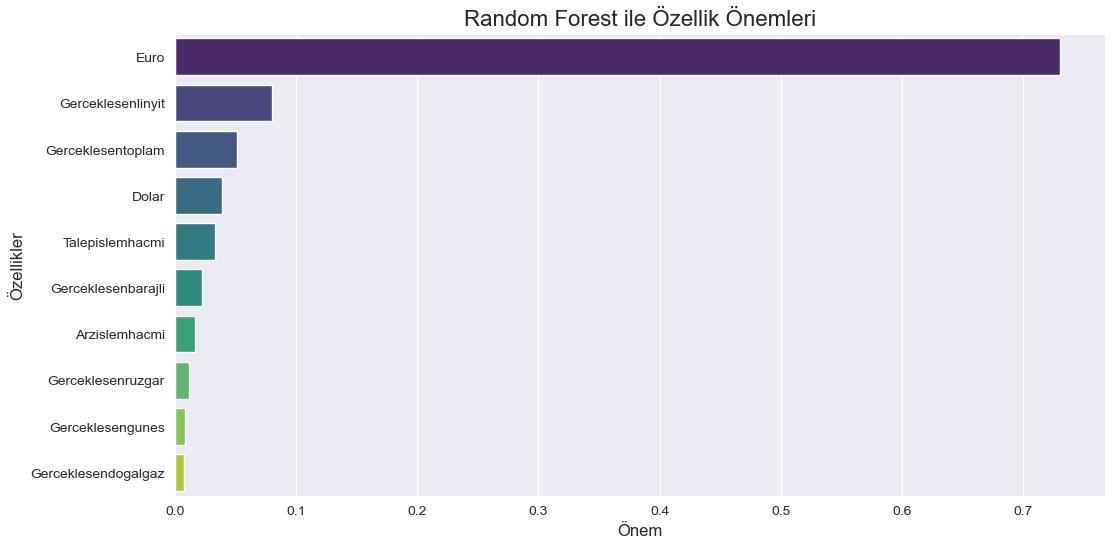

Model başarıyla eğitildi ve görselleştirme tamamlandı!


In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Dosya yolunu güncelleyin
file_path = r"C:\Users\PC\Documents\GitHub\LFD_24-25\data\processed\cleaned_smfdb_fixed.csv"

# Veri setini yükleme
columns = [
    "Tarih", "Blokeslesmemiktari", "Saatlikeslesmemiktari", "Minalisfiyati",
    "Maxalisfiyati", "Minsatisfiyati", "Maxsatisfiyati", "Mineslesmefiyati",
    "Maxeslesmefiyati", "Talepislemhacmi", "Arzislemhacmi", "Gerceklesendogalgaz",
    "Gerceklesenbarajli", "Gerceklesenlinyit", "Gerceklesenruzgar", "Gerceklesengunes",
    "Gerceklesenfueloil", "Gerceklesenjeotermal", "Gerceklesenasfaltitkomur",
    "Gerceklesentaskomur", "Gerceklesenbiyokutle", "Gerceklesennafta",
    "Gerceklesenlng", "Gerceklesenuluslararasi", "Gerceklesentoplam", "Smf",
    "Ptf", "Ptfdolar", "Ptfeuro", "Dolar", "Euro", "Smfdolar", "Smfeuro"
]

data = pd.read_csv(file_path, names=columns, skiprows=1)

# SMF hedefi ve özellik sütunları
target = "Smf"
features = [
    "Gerceklesendogalgaz", "Gerceklesenbarajli", "Gerceklesenlinyit",
    "Gerceklesenruzgar", "Gerceklesengunes", "Dolar", "Euro",
    "Talepislemhacmi", "Arzislemhacmi", "Gerceklesentoplam"
]

X = data[features]
y = data[target]

# Sonsuz değerleri temizleme
X = X.replace([float('inf'), -float('inf')], None)  # Sonsuz değerleri NaN olarak işaretle
X = X.fillna(0)  # NaN olanları sıfırla doldur

# Özelliklerin türlerini kontrol et
print("X sütunlarının türleri:")
print(X.dtypes)

# Eğitim ve test veri kümelerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test boyutlarını kontrol edin
print("X_train boyutu:", X_train.shape)
print("X_test boyutu:", X_test.shape)

# Standartlaştırma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest modeli oluştur ve eğit
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Özellik önemlerini hesapla
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Özellik önemlerini yazdır
print("\nÖzellik Önemleri:")
print(importance_df)

# Özellik önemlerini görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Random Forest ile Özellik Önemleri", fontsize=16)
plt.xlabel("Önem", fontsize=12)
plt.ylabel("Özellikler", fontsize=12)
plt.show()

print("Model başarıyla eğitildi ve görselleştirme tamamlandı!")


In [19]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Basit bir veri seti oluştur
X = np.random.rand(100, 5)  # 100 örnek, 5 özellik
y = np.random.rand(100)     # 100 hedef

# Random Forest modeli eğit
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

print("Model başarıyla eğitildi!")

print("X_train sütun türleri:")
print(X_train.dtypes)

print("\ny_train türü:")
print(type(y_train))
print(y_train.head())

print("\nX_train içindeki eksik değerler:")
print(X_train.isnull().sum())

print("\nX_train içindeki sonsuz değerler:")
print((X_train == float('inf')).sum())
print((X_train == -float('inf')).sum())

print("\ny_train içindeki eksik değerler:")
print(y_train.isnull().sum())

print("\ny_train içindeki sonsuz değerler:")
print((y_train == float('inf')).sum())
print((y_train == -float('inf')).sum())

print("\nX_train boyutu:", X_train.shape)
print("y_train boyutu:", y_train.shape)


Model başarıyla eğitildi!
X_train sütun türleri:
Gerceklesendogalgaz    float64
Gerceklesenbarajli     float64
Gerceklesenlinyit      float64
Gerceklesenruzgar      float64
Gerceklesengunes       float64
Dolar                  float64
Euro                   float64
Talepislemhacmi        float64
Arzislemhacmi          float64
Gerceklesentoplam      float64
dtype: object

y_train türü:
<class 'pandas.core.series.Series'>
09/07/2019 07:00  195.1     340.0
25/11/2020 00:00  204.9     203.5
22/05/2019 02:00  346.1     309.9
09/02/2023 02:00  665.4    3000.0
27/10/2022 19:00  886.4    4800.0
Name: Smf, dtype: float64

X_train içindeki eksik değerler:
Gerceklesendogalgaz    0
Gerceklesenbarajli     0
Gerceklesenlinyit      0
Gerceklesenruzgar      0
Gerceklesengunes       0
Dolar                  0
Euro                   0
Talepislemhacmi        0
Arzislemhacmi          0
Gerceklesentoplam      0
dtype: int64

X_train içindeki sonsuz değerler:
Gerceklesendogalgaz    0
Gerceklesenbarajli     

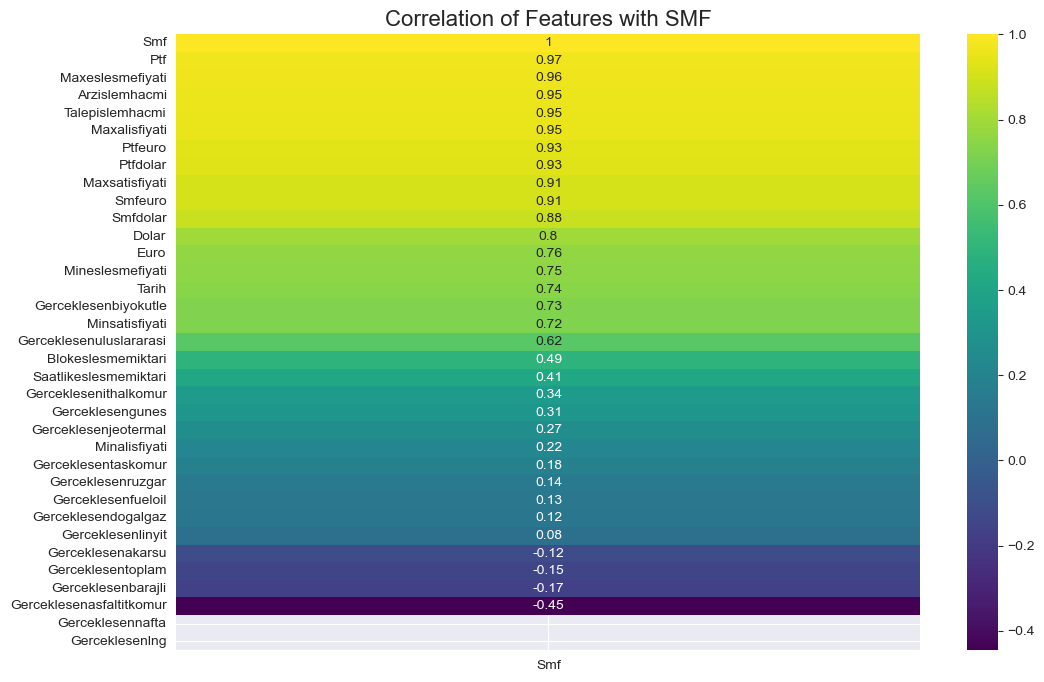

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Veri yükleme
file_path = r"C:\Users\PC\Documents\GitHub\LFD_24-25\data\processed\cleaned_smfdb_fixed.csv"
# Dosya yolunu güncelle
columns = [
    "Tarih", "Blokeslesmemiktari", "Saatlikeslesmemiktari", "Minalisfiyati",
    "Maxalisfiyati", "Minsatisfiyati", "Maxsatisfiyati", "Mineslesmefiyati",
    "Maxeslesmefiyati", "Talepislemhacmi", "Arzislemhacmi", "Gerceklesendogalgaz",
    "Gerceklesenbarajli", "Gerceklesenlinyit", "Gerceklesenakarsu", "Gerceklesenithalkomur",
    "Gerceklesenruzgar", "Gerceklesengunes", "Gerceklesenfueloil", "Gerceklesenjeotermal",
    "Gerceklesenasfaltitkomur", "Gerceklesentaskomur", "Gerceklesenbiyokutle",
    "Gerceklesennafta", "Gerceklesenlng", "Gerceklesenuluslararasi", "Gerceklesentoplam",
    "Smf", "Ptf", "Ptfdolar", "Ptfeuro", "Dolar", "Euro", "Smfdolar", "Smfeuro"
]

data = pd.read_csv(file_path, names=columns, skiprows=1, parse_dates=["Tarih"], dayfirst=True)

# Korelasyon matrisi
correlation_matrix = data.corr()

# SMF ile ilişkili sütunları görselleştir
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix[["Smf"]].sort_values(by="Smf", ascending=False),
    annot=True, cmap="viridis"
)
plt.title("Correlation of Features with SMF", fontsize=16)
plt.show()
